# **parkinson's disease**


In [1]:
#Importing neccesarry packages
# load libraries
import numpy as np
import pandas as pd
# Importing needed packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Importing needed packages for xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
#import needed packages for gradient boost
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files


uploaded = files.upload()

Saving parkinsons.csv to parkinsons.csv


In [4]:
dbData = pd.read_csv("parkinsons.csv")
dbData.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
dbData=dbData.drop(['name'],axis=1)
dbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [8]:
dbData.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [9]:
corr=dbData.corr()
cor_target = abs(corr["status"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.3]
relevant_features

MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Jitter(Abs)    0.338653
MDVP:Shimmer        0.367430
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:APQ5        0.351148
MDVP:APQ            0.364316
Shimmer:DDA         0.347608
HNR                 0.361515
status              1.000000
RPDE                0.308567
spread1             0.564838
spread2             0.454842
D2                  0.340232
PPE                 0.531039
Name: status, dtype: float64

In [10]:
dbData=dbData.drop(['MDVP:Fhi(Hz)','MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','Jitter:DDP','NHR','DFA'],axis=1)
dbData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Flo(Hz)      195 non-null    float64
 2   MDVP:Jitter(Abs)  195 non-null    float64
 3   MDVP:Shimmer      195 non-null    float64
 4   MDVP:Shimmer(dB)  195 non-null    float64
 5   Shimmer:APQ3      195 non-null    float64
 6   Shimmer:APQ5      195 non-null    float64
 7   MDVP:APQ          195 non-null    float64
 8   Shimmer:DDA       195 non-null    float64
 9   HNR               195 non-null    float64
 10  status            195 non-null    int64  
 11  RPDE              195 non-null    float64
 12  spread1           195 non-null    float64
 13  spread2           195 non-null    float64
 14  D2                195 non-null    float64
 15  PPE               195 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 24.5 

In [11]:
#seperating pridictors and response
X = dbData.drop(['status'], axis=1)
y = dbData['status']

In [13]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5) # 50% training and 50% test

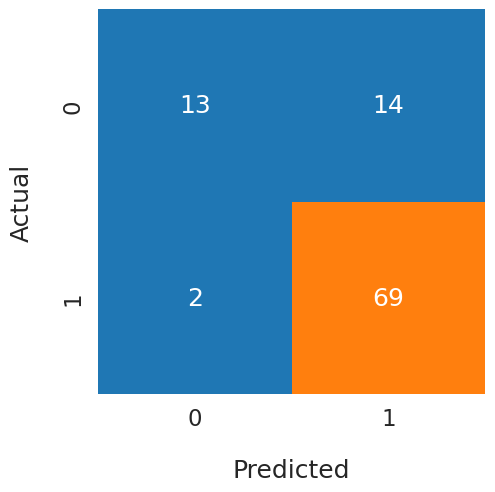

Accuracy: 83.67% gradientBoost
--- 0.5037555694580078 seconds ---
Precision = 0.849
Recall = 0.7267
F1 Score = 0.7576


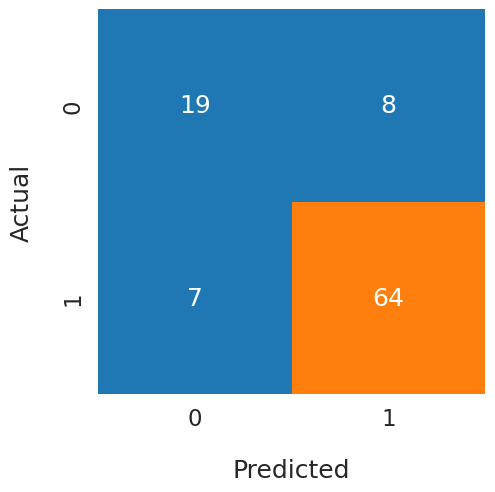

Accuracy: 84.69% AdaModel
--- 1.949937105178833 seconds ---
Precision = 0.8098
Recall = 0.8026
F1 Score = 0.806


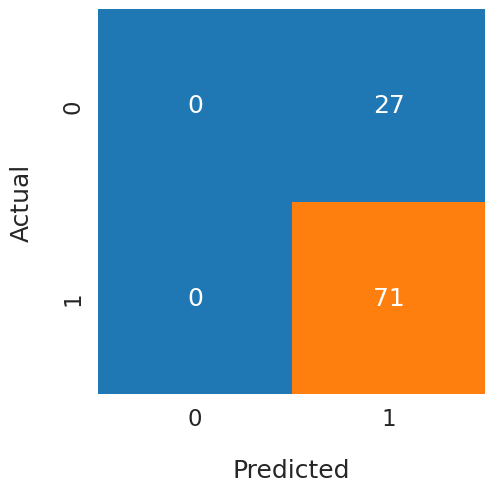

Accuracy: 72.45% XGB
--- 0.8924596309661865 seconds ---
Precision = 0.3622
Recall = 0.5
F1 Score = 0.4201


In [15]:
#Running various models
import matplotlib.pyplot as plt
import seaborn as sns
models = []
models.append(('gradientBoost', GradientBoostingRegressor(max_depth=2,n_estimators=20,learning_rate=1.0)))
models.append(('AdaModel',AdaBoostClassifier(n_estimators=350,
                         learning_rate=1)))
models.append(('XGB',XGBClassifier(eta=0.01,gamma=10))) #eta = 0.01,gamma = 10

import time

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
acc = []
pres = []
rec = []
f1 = []

for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5,5))
    sns.set(font_scale = 1.5)
    ax = sns.heatmap(
    conf_matrix, annot=True, fmt='d',
    cbar=False, cmap='tab10', vmax=500)

    ax.set_xlabel("Predicted", labelpad=20)
    ax.set_ylabel("Actual", labelpad=20)
    plt.show()

    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0),name)
    print("--- %s seconds ---" % (time.time() - start_time))
    precision = precision_score(y_test,predictions, average= 'macro')
    recall = recall_score(y_test,predictions, average= 'macro')
    f1score = f1_score(y_test, predictions, average='macro')
    print(f"Precision = {precision.round(4)}")
    print(f"Recall = {recall.round(4)}")
    print(f"F1 Score = {f1score.round(4)}")
    acc.append(accuracy*100)
    pres.append(precision.round(4))
    rec.append(recall.round(4))
    f1.append(f1score.round(4))

[83.6734693877551, 84.6938775510204, 72.44897959183673]


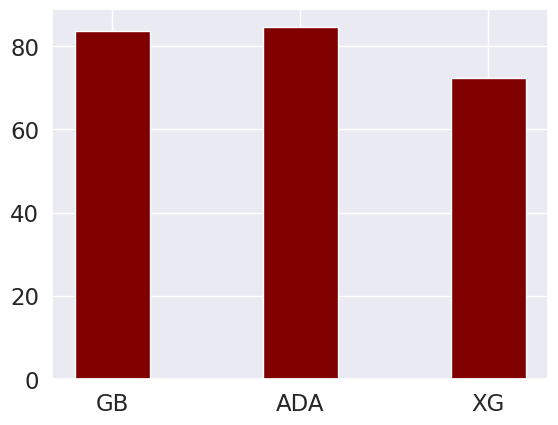

[0.849, 0.8098, 0.3622]


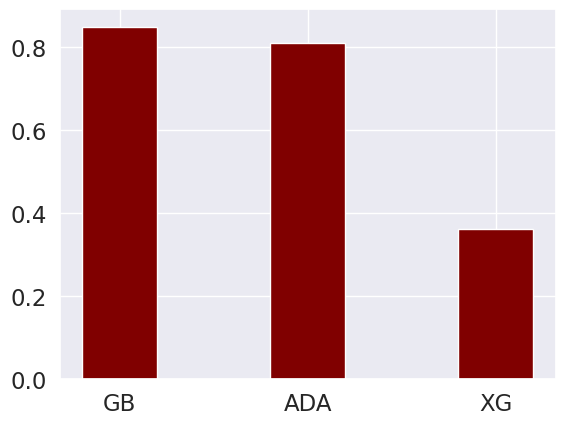

[0.7267, 0.8026, 0.5]


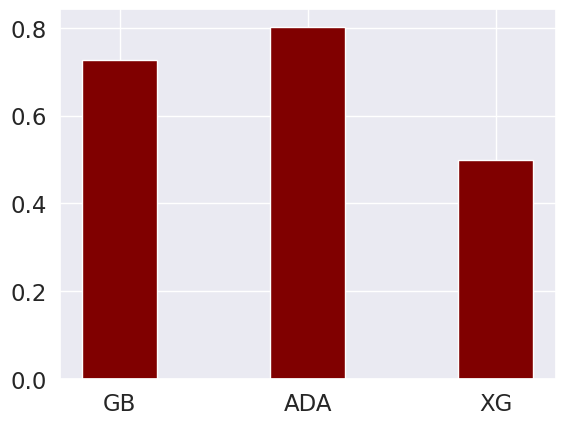

[0.7576, 0.806, 0.4201]


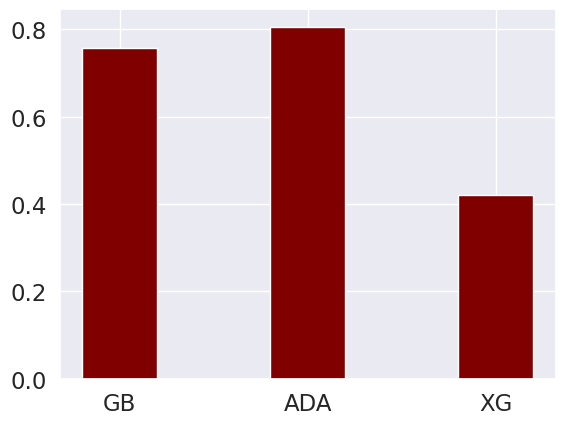

In [16]:
print(acc)
#plotting accuracy graph
plt.xlabel = ('model')
plt.ylabel = ('Accuracy')
bm= ['GB', 'ADA', 'XG']
plt.bar(bm, acc , color ='maroon',
        width = 0.4)
plt.show()

print(pres)
#plotting precision graph
plt.xlabel = ('model')
plt.ylabel = ('precision')
bm= ['GB', 'ADA', 'XG']
plt.bar(bm, pres , color ='maroon',
        width = 0.4)
plt.show()

print(rec)
#plotting recall graph
plt.xlabel = ('model')
plt.ylabel = ('recall')
bm= ['GB', 'ADA', 'XG']
plt.bar(bm, rec , color ='maroon',
        width = 0.4)
plt.show()

print(f1)
#plotting f1_score graph
plt.xlabel = ('model')
plt.ylabel = ('f1score')
bm= ['GB', 'ADA', 'XG']
plt.bar(bm, f1 , color ='maroon',
        width = 0.4)
plt.show()





In [ ]:
r2_score(y_pred,y_test)

-0.11428571428571388